#  NEURAL NETWORK ASSIGNMENT
NAME: AINE IAN
REGISTRATION NUMBER: 2022/HD05/1758U
STUDENT NUMBER: 2200701758

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Flatten 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 
from tensorflow.keras.preprocessing.image import load_img, img_to_array


from keras import regularizers
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout



from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
DATA_DIR = "C:\\Users\\Dell\\Desktop\\assignment\\deep_learning_project\\dataset1\\known_images"

#image Class = ["normal", "sick"]

for image_class in os.listdir(DATA_DIR):
  print(image_class)

normal
sick


In [3]:
for image_class in os.listdir(DATA_DIR):
    for image in os.listdir(os.path.join(DATA_DIR,image_class)):
      print(image)

normal_0.png
normal_1.png
normal_10.png
normal_101.png
normal_102.png
normal_103.png
normal_104.png
normal_105.png
normal_106.png
normal_107.png
normal_108.png
normal_109.png
normal_11.png
normal_110.png
normal_111.png
normal_112.png
normal_113.png
normal_114.png
normal_115.png
normal_116.png
normal_117.png
normal_118.png
normal_119.png
normal_12.png
normal_120.png
normal_121.png
normal_122.png
normal_123.png
normal_124.png
normal_125.png
normal_126.png
normal_127.png
normal_128.png
normal_129.png
normal_13.png
normal_130.png
normal_131.png
normal_132.png
normal_133.png
normal_134.png
normal_135.png
normal_136.png
normal_137.png
normal_138.png
normal_139.png
normal_140.png
normal_141.png
normal_142.png
normal_143.png
normal_144.png
normal_145.png
normal_146.png
normal_147.png
normal_148.png
normal_149.png
normal_15.png
normal_150.png
normal_151.png
normal_152.png
normal_153.png
normal_154.png
normal_155.png
normal_156.png
normal_157.png
normal_158.png
normal_159.png
normal_16.png
norma

In [4]:
dataset= tf.keras.utils.image_dataset_from_directory("C:\\Users\\Dell\\Desktop\\assignment\\deep_learning_project\\dataset1\\known_images")

Found 715 files belonging to 2 classes.


In [5]:
data_iterator = dataset.as_numpy_iterator()

In [6]:
#creating a batch of images from the iterator
batch = data_iterator.next()

In [7]:
# images represented as numoy arrays
batch[0].shape

(32, 256, 256, 3)

In [8]:
batch[1]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

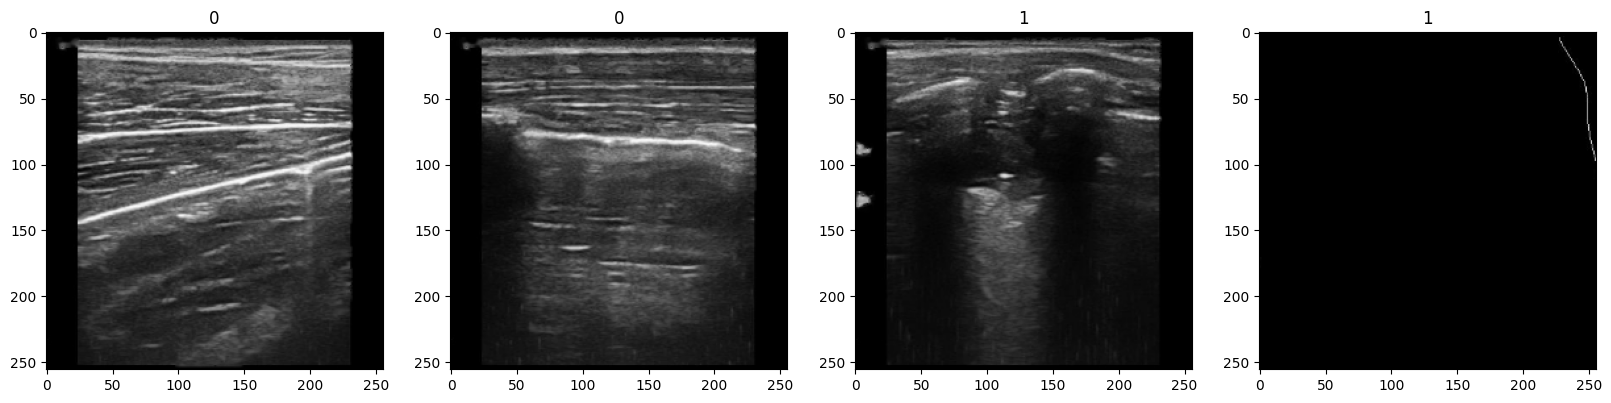

In [9]:
fig,ax = plt.subplots(ncols =4, figsize=(20,20))
for idx, image in enumerate(batch[0][:4]):
    ax[idx].imshow(image.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Data preprocessing

#scaling the data

In [10]:
dataset=dataset.map(lambda x, y: (x/255 , y))
scaled_iterator = dataset.as_numpy_iterator()
batch = scaled_iterator.next()



Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [11]:
print(batch[0].min())
print(batch[0].max())

0.0
0.9913189


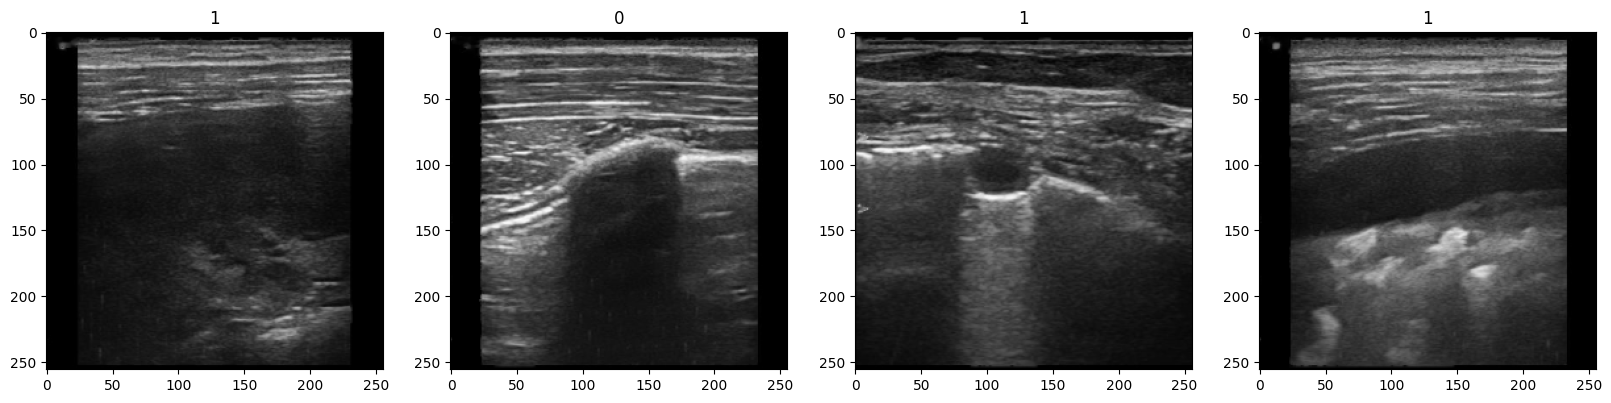

In [12]:
fig,ax = plt.subplots(ncols =4, figsize=(20,20))
for idx, image in enumerate(batch[0][:4]):
    ax[idx].imshow(image)
    ax[idx].title.set_text(batch[1][idx])

#splitting Data

In [13]:
#splitting Data
len(dataset)  #number of batches of 32

23

In [14]:
train_size= int(len(dataset)*0.7)
val_size= int(len(dataset)*0.2)+1
test_size= int(len(dataset)*0.1)

In [15]:
print(train_size,val_size,test_size)
print(train_size+val_size+test_size)

16 5 2
23


In [16]:
train= dataset.take(train_size)
val= dataset.skip(train_size).take(val_size)
test= dataset.skip(train_size + val_size).take(test_size)

# Build a deep learning Model


In [17]:
model = Sequential()


In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# compling the model

In [19]:

model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#Training and fitting the model

In [21]:
#Training and fitting the model   
LOG_DIR = "C:\\Users\\Dell\\Desktop\\assignment\\deep_learning_project\\dataset1\\logs"

In [22]:
tensorboard_callback = TensorBoard(log_dir= LOG_DIR)

In [23]:
hist = model.fit(train, epochs=20, validation_data= val, callbacks= [tensorboard_callback])  

Epoch 1/20
16/16 [==============================] - 8s 445ms/step - loss: 0.4501 - accuracy: 0.7656 - val_loss: 0.1806 - val_accuracy: 0.9250
Epoch 2/20
16/16 [==============================] - 7s 435ms/step - loss: 0.1567 - accuracy: 0.9434 - val_loss: 0.1403 - val_accuracy: 0.9563
Epoch 3/20
16/16 [==============================] - 7s 429ms/step - loss: 0.1628 - accuracy: 0.9316 - val_loss: 0.1007 - val_accuracy: 0.9750
Epoch 4/20
16/16 [==============================] - 7s 425ms/step - loss: 0.0863 - accuracy: 0.9727 - val_loss: 0.0730 - val_accuracy: 0.9688
Epoch 5/20
16/16 [==============================] - 7s 425ms/step - loss: 0.0501 - accuracy: 0.9805 - val_loss: 0.1263 - val_accuracy: 0.9625
Epoch 6/20
16/16 [==============================] - 7s 432ms/step - loss: 0.0271 - accuracy: 0.9922 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 7s 437ms/step - loss: 0.0169 - accuracy: 0.9961 - val_loss: 0.0531 - val_accuracy: 0.9875
Epoch 

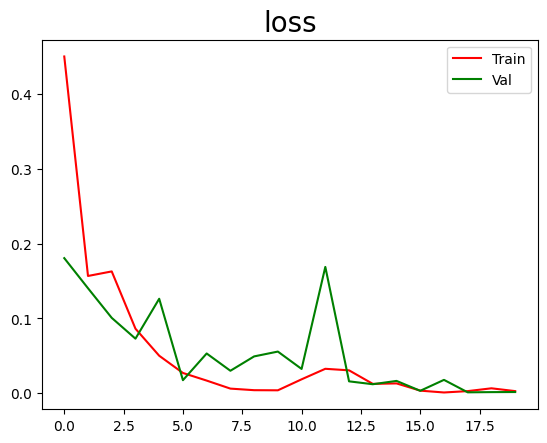

In [24]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='red', label = 'loss')
plt.plot(hist.history['val_loss'], color='green', label = 'val_loss')
plt.title('loss', fontsize=20)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

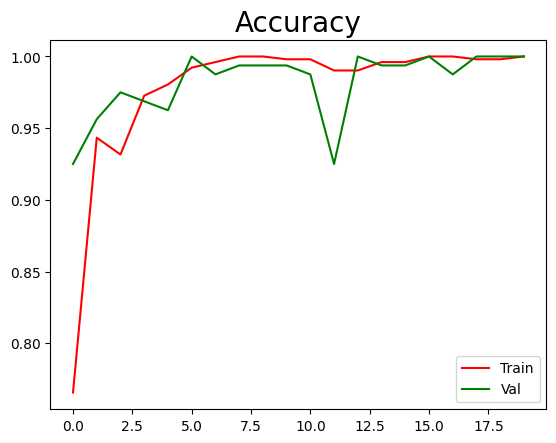

In [25]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label = 'val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Evaluate the deep learning model

In [26]:
p = Precision()
r = Recall() 
a = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator():
    x, y = batch
    evaluate = model.predict(x)
    
    p.update_state(y,evaluate) 
    r.update_state(y,evaluate)  
    a.update_state(y,evaluate)
    

1/1 [==============================] - 0s 76ms/step


In [28]:
print(f'Pecision:{p.result().numpy()}, Recall:{r.result().numpy()}, Accuracy:{a.result().numpy()}')

Pecision:1.0, Recall:1.0, Accuracy:1.0


#Testing the model

In [29]:


path = "C:\\Users\\Dell\\Desktop\\assignment\\deep_learning_project\\dataset1\\unknown_images"
onlyfiles = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
print("Only files in '", path, "' :")
print(onlyfiles)


Only files in ' C:\Users\Dell\Desktop\assignment\deep_learning_project\dataset1\unknown_images ' :
['1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '4.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '5.png', '50.png', '6.png', '7.png', '8.png', '9.png']


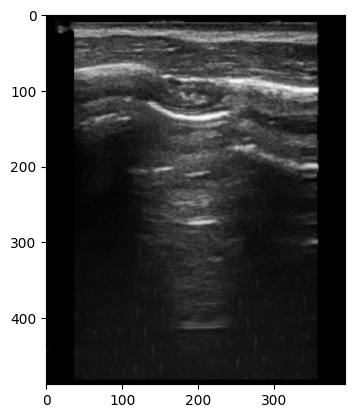

In [30]:
img = cv2.imread("C:\\Users\\Dell\\Desktop\\assignment\\deep_learning_project\\dataset1\\unknown_images\\1.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


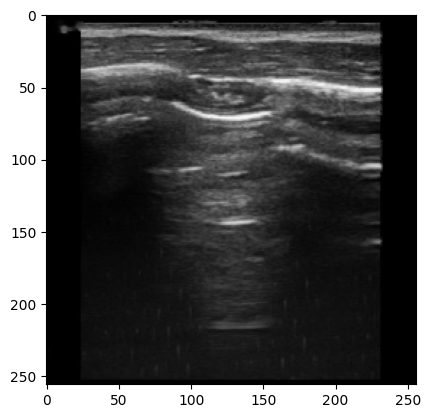

In [31]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
 evaluate = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 18ms/step


In [33]:
evaluate

array([[0.9808275]], dtype=float32)

In [34]:
if evaluate > 0.5:
     print("Predicated class is normal")
else:
     print("Predicated class is sick")

Predicated class is normal


# saving the model

In [35]:

from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'deep learning assignment 2.h5'))

In [36]:
#Activate model

activate_model = load_model(os.path.join('models', 'deep learning assignment 2.h5'))
a_m = activate_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 55ms/step


In [37]:
if a_m > 0.5:
       print("Predicated class is normal")
else:
      print("Predicated class is sick")

Predicated class is normal


# classifying all the images located in the “unknown_images”

In [38]:

# Load the model
model = load_model('models/deep learning assignment 2.h5')

#loading Images from the Unknown directory


image_dir = 'C:\\Users\\Dell\\Desktop\\assignment\\deep_learning_project\\dataset1\\unknown_images'
image_size = (256, 256) 
img_height, img_width = image_size


# Get the list of image filenames in the "unknown_images" directory
image_filenames = os.listdir(image_dir)

# Create an empty list to store the predicted labels
predicted_labels = []

# Loop through the image filenames and predict the labels
for filename in image_filenames:
    # Load the image
    img = load_img(os.path.join(image_dir, filename), target_size=(img_height, img_width))
    
    # Preprocess the image
    img_arr = img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0
    
    # Make a prediction
    pred = model.predict(img_arr)[0][0]
    predicted_labels.append('NORMAL' if pred > 0.5 else 'SICK')

# Creating a DataFrame with the predicted labels for the images 
df = pd.DataFrame({'Filename': image_filenames, 'Predicted Label': predicted_labels})

# creating a CSV file
df.to_csv('(Dataset 1)predicted_labels for unknown Images.csv', index=False)


1/1 [==============================] - 0s 18ms/step


# DATASET 2

# classifying all the images located in the DATASET 2

In [39]:

# Load the model
model = load_model('models/deep learning assignment 2.h5')

#loading Images from the Unknown directory


image_dir = 'C:\\Users\\Dell\\Desktop\\assignment\\deep_learning_project\\dataset2\\images'
image_size = (256, 256) 
img_height, img_width = image_size


# Get the list of image filenames in the "unknown_images" directory
image_filenames = os.listdir(image_dir)

# Create an empty list to store the predicted labels
predicted_labels = []

# Loop through the image filenames and predict the labels
for filename in image_filenames:
    # Load the image
    img = load_img(os.path.join(image_dir, filename), target_size=(img_height, img_width))
    
    # Preprocess the image
    img_arr = img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0
    
    # Make a prediction
    pred = model.predict(img_arr)[0][0]
    predicted_labels.append('NORMAL' if pred > 0.5 else 'SICK')

# Creating a DataFrame with the predicted labels for the images 
df = pd.DataFrame({'Filename': image_filenames, 'Predicted Label': predicted_labels})

# creating a CSV file
df.to_csv('(Dataset 2)predicted_labels.csv', index=False)


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


# Test the performance of your model on dataset2

In [46]:
p = Precision()
r = Recall() 
a = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
    x, y = batch
    pred = model.predict(x)
    
    p.update_state(y,pred) 
    r.update_state(y,pred)  
    a.update_state(y,pred)
    

1/1 [==============================] - 0s 39ms/step


In [48]:
print(f'Pecision:{p.result().numpy()}, Recall:{r.result().numpy()}, Accuracy:{a.result().numpy()}')

Pecision:1.0, Recall:1.0, Accuracy:1.0


# Thank you so much



